# Data Science for Business Analytics 
## Review of some important things, and more

***

Spring 2017 - Prof. Foster Provost

Teacher Assistant: Maria L Zamora Maass

## 1. Python Packages

Python incorporates *many* packages to support a wide range of tasks. Some of these packages are maintained by the same people that work on the Python programming language. Others are created by 3rd party teams. There are packages to do basic tasks like simple math and telling time. Other packages are used mainly for handling data, to do scientific computing, or machine learning. For the homework assignments, we generally focused on 2 or 3 packages (usually with helpful hints!). In this notebook, we are going to introduce some additional  packages that may be useful for you going forward.

And you can also find more [here !!!](https://wiki.python.org/moin/UsefulModules)

### 1.1 General Use
General use packages are used mainly to coordinate and structure your Python code. You can use `time` and `datetime` to keep track of how long it takes to run certain tasks or to format dates and times. The `os` and `sys` packages let you make calls to the computer's operating system and access programs outside of Python (e.g. the command line!). You can use `math` to do mathematical operations slightly more advanced than addition, subtraction, etc. (e.g. exponentiation). The `re` package lets you use regular expressions.

In [1]:
import time
import datetime
import decimal
import os
import sys
import math
import re
import pickle
import random

### 1.2. Data Handling and web crawling
Python comes with packages for reading `csv`, `json`, and `xml` files natively. If you want to use something with more features, `pandas` is useful for creating data frames (a common data structure used in data science and machine learning). Some of you may be dealing with HTML data from web pages and will find Beautiful Soup 4 (`bs4`) and `urllib2` useful.

In [6]:
import csv
import json
import xml
import pandas as pd
import bs4
import urllib.request
import urllib.error
import requests

### 1.3. Data Visualization

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import wordcloud
#import bokeh  Not in Python 3?
import seaborn

Let's use another library, for example, seaborn to create a heatmap of correlations:

[see complete example](http://seaborn.pydata.org/examples/many_pairwise_correlations.html)

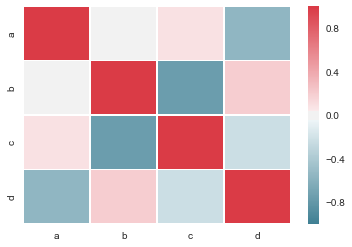

In [8]:
# Random sample with a twist
a = random.sample(range(0,100),  25)
b = random.sample(range(0,100),  25)
temp_c = random.sample(range(0,100),  25)
c = [x - y for x, y in zip(temp_c, b)]
temp_d = random.sample(range(0,100),  25)
d = [x - y for x, y in zip(temp_d, a)]

# Correlations using Pandas
dataset = pd.DataFrame(list(zip(a,b,c,d)),columns=['a','b','c','d'])
correlations = dataset.corr()

# Seaborn plot
seaborn.heatmap(correlations, cmap=seaborn.diverging_palette(220, 10, as_cmap=True), linewidths=.5)


### 1.4 Scientific Computing
The `numpy` and `scipy` packages are probably two of the most popular Python packages in data science. They will give you the ability to use arrays and matrices (both dense and sparse). They also give a ton of basic operations (max, min, argmax, argmin, etc.) For those of you with Matlab experience, you may notice a lot of similarity as scipy and numpy were written based on Matlab.

In [9]:
import numpy as np
import scipy
import nltk  # Natural Language Processing

### 1.5. Machine Learning
The package we have been using all semester to do machine learning, sci-kit learn (`sklearn`), is one of the most popular machine learning packages currently in use. Throughout the semeseter you have probably noticed that we have been using a *ton* of different functions and features. The documentation on sklearn is vast, and there are new books published on it all the time. 

There are other machine learning packages, some of which only specialize in some small subset of tasks (e.g., only doing SVM, or only doing clustering). We won't dicuss any now, but if you are doing one thing, and need to tweak performance, you might find a dedicated package to be more useful.

In [10]:
import sklearn
import statsmodels
# import theano
# import tensorflow  #(advanced) neural network library

Just for simplicity in class, I'm going to set a random seed so that we all get the same answers.

In [11]:
np.random.seed(36)

## 2. The Data Science Workflow
&nbsp;
<div style="float: left; width: 50%">
We've talked about the "data science workflow" or "data miningi process" a lot through out the semeseter, but I just want to remind everyone of what it looks like.

<ol style="padding: 20px 0;">
<li>Business understanding</li>
<li>Data understanding</li>
<li>Data Preparation</li>
<li>Modeling</li>
<li>Evaluation</li>
<li>Deployment</li>
</ol>

While we have spent time in all the phases of the workflow, now let's focus a bit more on the hands-on skills you have learned.
</div>
<div style="float: left; width: 40%">
<img src="images/workflow.png" width="100%"/>
</div>

## 3. Data Exploration and Cleaning
We discuss data processing, cleaning, and exploration in our very first class and went on to touch on it a few more times throughout the semester. However, I'd like to review some of this again given some common questions I've been getting.

### 3.1. Structured Data
Almost all of the data we have dealt with so far can be called *structured* data. This means that every record in the data set is organized and structured in a machine readable way.  Very often "structured" corresponds to being organized in a common database structure (essentially one or more possibly related tables). 

The four most popular ways of storing structured data are:

- **.csv or .tsv** - Can be thought of as rows and columns, where each column will represent a single feature. All rows should have a value for each column (although some analytics methods will deal with blanks).
- **JSON** - Looks similar to Python dictionaries. Each row can have an unordered list of `key:value`s
- **XML** - Tagging language that looks something like HTML. More similar to JSON than to csv or tsv.
- **A full-blown relational database** -- A relational database has tables for entities and for relationships, with keys (identifiers) related the tables to each other.  Examples of common databases are mysql and commercial databased provided by Oracle, Microsoft, etc.

The layout of any of these data types might seem straightforward, but there can be tons of complications. 

**A file ending in `.csv` does *not* mean that it will be well structured. It is still just a text file.**

There is a data file in the `/data/` folder called `strings_*.csv`. This csv file has no header. However, we know the columns are: 'age', 'satisfaction', 'location', 'time_spent', 'income', 'bio', 'purchased'. Let's see it:


In [12]:
!head data/strings_ugly.csv

63.0,neutral,eu,3.952074059758619,-19.48620784914078,Sodales "vivamus" in, risus molestie, egestas in.,0
28.0,neutral,sa,3.5295183836057595,51.284180040232215,Pellentesque arcu sed.,1
37.0,high,sa,4.254526317975149,97.34526006557826,Neque odio, in nulla, lorem nec.,0
42.0,high,sa,4.924077485580787,80.24260604790156,Lorem non pretium.,0
56.0,high,af,6.436250132712625,42.78962533750958,Sem dictum dolor.,0
40.0,neutral,af,4.576757605316351,-1.0876572412988317,Neque condimentum.,1
69.0,neutral,eu,5.365851342999525,-15.770934329395772,Nisl fames ipsum, amet laoreet.,0
44.0,high,sa,2.912293368604344,73.85944600120466,Arcu quisque, vitae turpis integer, fusce luctus.,1
63.0,neutral,eu,4.376757476733249,3.9510213482794034,Feugiat diam, at ipsum.,0
56.0,neutral,eu,3.461138913269333,-46.426105926443086,Metus elit.,1


In [13]:
data = pd.read_csv("data/strings_ugly.csv")
data.head()

,63.0,neutral,eu,3.952074059758619,-19.48620784914078,"Sodales ""vivamus"" in",risus molestie,egestas in.,0
0,28.0,neutral,sa,3.529518,51.284180,Pellentesque arcu sed.,1,NaN,NaN
1,37.0,high,sa,4.254526,97.345260,Neque odio,in nulla,lorem nec.,0.0
2,42.0,high,sa,4.924077,80.242606,Lorem non pretium.,0,NaN,NaN
3,56.0,high,af,6.436250,42.789625,Sem dictum dolor.,0,NaN,NaN
4,40.0,neutral,af,4.576758,-1.087657,Neque condimentum.,1,NaN,NaN


That can't be right. If you look at the data you'll see that there are commas in one of the fields. Encapsulate and escape them.  (One would do this manually, or by building regular expressions (for example, noting that the truly delimiting quotes always are preceded or followed by a comma), or a combination of both (there might be a spurious quote followed by a comma within a string).

In [14]:

column_names = ['age', 'satisfaction', 'location', 'time_spent', 'income', 'bio', 'purchased']

# quotechar = The character used to denote the start and end of a quoted item. Quoted items can include 
#             the delimiter and it will be ignored. In this case " is considered as the quoting character.

# escapechar = One-character string used to escape delimiter. In this cases spaces won't be considered 'delimiter'.

data = pd.read_csv("data/strings_escaped.csv", names=column_names, quotechar="\"", escapechar="\\")



data.head()


,age,satisfaction,location,time_spent,income,bio,purchased
0,63.0,neutral,eu,3.952074,-19.486208,"Sodales ""vivamus"" in, risus molestie, egestas in.",0
1,28.0,neutral,sa,3.529518,51.284180,Pellentesque arcu sed.,1
2,37.0,high,sa,4.254526,97.345260,"Neque odio, in nulla, lorem nec.",0
3,42.0,high,sa,4.924077,80.242606,Lorem non pretium.,0
4,56.0,high,af,6.436250,42.789625,Sem dictum dolor.,0


This data cleaning can go on for a long time until you find all the small nuances to your data file. Notice that we keep adding levels of complexity to our parser. Doing this at the command line is very tricky, which is why using pandas and `read_csv()` are very nice. A lot of the problems we just saw are unfortunately solved by editing the raw data to conform to some kind of standards. Regular expressions can be very useful.

We seem to have three fields that aren't numeric. Since we need numeric features for many of our machine learning algorithms, let's convert them.

In [15]:
# Convert 'satisfaction' to be on a scale from -2 to +2
data['satisfaction'] = data['satisfaction'].replace(['very low', 'low', 'neutral', 'high', 'very high'], 
                                                    [-2, -1, 0, 1, 2])
data.head()

,age,satisfaction,location,time_spent,income,bio,purchased
0,63.0,0,eu,3.952074,-19.486208,"Sodales ""vivamus"" in, risus molestie, egestas in.",0
1,28.0,0,sa,3.529518,51.284180,Pellentesque arcu sed.,1
2,37.0,1,sa,4.254526,97.345260,"Neque odio, in nulla, lorem nec.",0
3,42.0,1,sa,4.924077,80.242606,Lorem non pretium.,0
4,56.0,1,af,6.436250,42.789625,Sem dictum dolor.,0


In [16]:
# We can convert location into dummy variables by binarizing:
for value in np.unique(data['location'])[0:-1]:
    data['location_' + value] = pd.Series(data['location'] == value, dtype=int)
data = data.drop(['location'], axis=1)
data.head()

,age,satisfaction,time_spent,income,bio,purchased,location_a,location_af,location_aus,location_eu,location_in,location_na
0,63.0,0,3.952074,-19.486208,"Sodales ""vivamus"" in, risus molestie, egestas in.",0,0,0,0,1,0,0
1,28.0,0,3.529518,51.284180,Pellentesque arcu sed.,1,0,0,0,0,0,0
2,37.0,1,4.254526,97.345260,"Neque odio, in nulla, lorem nec.",0,0,0,0,0,0,0
3,42.0,1,4.924077,80.242606,Lorem non pretium.,0,0,0,0,0,0,0
4,56.0,1,6.436250,42.789625,Sem dictum dolor.,0,0,1,0,0,0,0


In [17]:
# Last up is our text data, let's use a binary vectorizer to convert these to numeric
from sklearn.feature_extraction.text import CountVectorizer

# Fit the vectorizer
binary_vectorizer = CountVectorizer(binary=True)
binary_vectorizer.fit(data['bio'])

# I want to convert the numeric text data into a pandas DataFrame with meaninful column names. 
# To do this, I need to create a list of column headers. I will parse through the output of the
# vocabulary to figure out the order and set column names.
vocabulary = binary_vectorizer.vocabulary_
bv_columns = list(range(len(vocabulary)))
for word in vocabulary:
    bv_columns[vocabulary[word]] = "bio_" + word

# Transform the data using the vectorizer, convert it to dense, put it into pandas with our column names
bio_numeric = pd.DataFrame(binary_vectorizer.transform(data['bio']).todense(), columns=bv_columns)

# Merge the data DataFrame and the text DataFrame
data = pd.concat([data, bio_numeric], axis=1)

# Drop the raw string data entirely
data = data.drop(['bio'], axis=1)

data.head()


,age,satisfaction,time_spent,income,purchased,location_a,location_af,location_aus,location_eu,location_in,...,bio_velit,bio_venenatis,bio_vestibulum,bio_vitae,bio_vivamus,bio_viverra,bio_voluptatem,bio_volutpat,bio_vulputate,bio_wisi
0,63.0,0,3.952074,-19.486208,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,28.0,0,3.529518,51.284180,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,37.0,1,4.254526,97.345260,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,42.0,1,4.924077,80.242606,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,56.0,1,6.436250,42.789625,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


While not required, you will often see people place their target variable into a Python variable called `Y` and to put all their predictors into `X`.

In [18]:
X = data.drop(['purchased'], axis=1)
Y = data['purchased']

### 3.2. Semi-structured Data
We've never really talked much about this in class, but some of you will have semi-structured data in your projects. Often text is considered to be "unstructured" data (even though it contains vast amounts of lingustic structure).  "Semi-structured" refers to data that has some explicit structure (rather than just implicit linguistic structure), but it is not fully structured as tables, rows, and columns

For example, web pages are structured, somewhat, with HTML tags. Within a page, the structure may be quite regular, and a set of pages from the same site may have similar structure.  On the other hand, the structure on different pages or different sites can be dramatically different. In Homework 2 you used regular expressions to parse data out of an HTML page. 

We can also use the BeautifulSoup package to parse data out of html (and xml too).  For example, let's extract the products for sale on this Etsy page: https://www.etsy.com/search?q=lamp

In [20]:

# Open the page and soup-it

opener = urllib.request.build_opener()
opener.addheaders = [('User-Agent', 'Mozilla/5.0')]
page = opener.open('https://www.etsy.com/search?q=lamp')

soup = bs4.BeautifulSoup(page.read(), "html.parser")


# We will collect the title, seller, and price of each product
    
items = {'title': [], 'seller': [], 'price': []}
for title, seller, price in zip(soup.findAll('div',{'class':'card-meta-row-item card-title selected-color'}), 
                        soup.findAll('div',{'class':'card-meta-row-item text-truncate overflow-hidden card-shop-name'}), 
                        soup.findAll('span',{'class':'currency text-smaller'})):
    
    items['title'].append(title.text.strip())
    items['seller'].append(seller.text.strip())
    items['price'].append(price.text.strip())

    
# Convert to a pandas DataFrame
etsy_items = pd.DataFrame(items)

etsy_items.head(10)


NameError: name 'urllib2' is not defined

## 4. Modeling
We've covered two different methods of modeling: supervised and unsupervised.

### 4.1. Supervised
Most of what we've done this semester involves having **labeled** data. For these data, we have a set of records where we know the value of the target variable. This allows us to learn some relationship between our feature set and the target variable. We've covered five machine learning algorithms that can do this. Here is a brief overview of the modeling methods for classification (regression overview would be similar).

<table>
<tr><td>Model</td>
<td>Overview</td>
<td>Pros</td>
<td>Cons</td>
<td>Use Case</td></tr>

<tr><td>Tree Structured</td>
 <td>Partitions the data space by carving it up into (hyper)rectangles, creating a "supervised segmentation" -- that is, a segmentation of the space driven by differences in the value of the target variable.  Each segment comes with an estimate of the probability of class membership for data points falling in the segment.<br />
 
 </td>
 <td>- Non-linear model (low bias) <br />
     - Tree-structure can be interpretable <br />
     - In theory can fit arbitrary functions of the input features to arbitrary precision<br />
     - Fast test for non-linearity in a data set<br />
     - Fast and easy to apply, as long as tree isn't too big<br />
     - Often an attractive alternative to clustering, when a target variable exists<br />
     - The basis for many state-of-the-art methods (e.g., random forests)
     </td>
 <td>- Separating planes will be perpendicular to a feature, thus unnatural for curved boundaries<br />
     - Trees can be very complex (thus, maybe not so interpretable)<br />
     - Prone to overfitting</td>
 <td>- Data with mixed numeric and categorical features, and not a huge number of relevant features</td></tr>
 
<tr><td>Logistic Regression</td>
 <td>Creates a hyperplane (linear function) separating the classes, plus an estimate of class probability based on the distance of a point from the hyperplane. </td>
 <td>- Coefficients to interpret<br />
     - Low overfitting (low variance)<br />
     - Can be effective even with massive numbers of features<br />
     - Fast and easy in "use phase"</td>
 <td>- Coefficients to interpret<br />
     - Can be slow to train (need to think about the optimization routine "under the hood")<br />
     - Will only learn "linear part" of true concept (high bias)</td>
 <td>- Always try it</td></tr>


<tr><td>SVM</td>
 <td>Very similar to logistic regression, without the probability estimate.  Creates a hyperplane that can separate the data with the maximal **margin**.</td>
 <td>- Different "kernels" available, that can turn it into a non-linear method</td>
 <td>- Can be sloooooow </td>
 <td>- Try it for text data</td></tr>

<tr><td>Naive Bayes</td>
 <td>Applies Bayes Theorem, based on simple counts, to estimate class membership probabilities.</td>
 <td>- Fast training<br />
     - Super easy to get running fast in most production environments<br />
     - Can be implemented with SQL queries (or in Excel!)</td>
 <td>- Treats the features as independent of each other within each class<br />
     - Actual probabilities often are quite biased
     </td>
 <td>- Text data<br />
     - High-dimensional behavior data (e.g., locations, URLs, Likes, ...)</td></tr>

<tr><td>k-NN</td>
 <td>Reasons about a case by finding the $k$-closest records and combines their labels (e.g., with majority voting or an average).</td>
 <td>- Works with any number of labels<br />
     - Fast "learning" (lazy)</td>
 <td>- Slow prediction</td>
 <td>- When choosing "the closest cases" makes sense to the users/stakeholders</td></tr>
</table>

### 4.2. Unsupervised
Unsupervised algorithms are used for data where there is no target variable or no labels for your target variable.  

<table>
<tr><td>Model</td>
<td>Overview</td>
<td>Pros</td>
<td>Cons</td></tr>

<tr><td>K-Means</td>
 <td>Creates **$k$ clusters** where each record belongs to the cluster with the closest mean (center)</td>
 <td>- Fast (relatively)</td>
 <td>- k is very likely unknown<br />
     - Nondeterministic</td></tr>
 
<tr><td>Hierarchical Clustering</td>
 <td>Creates an increasing number of clusters by continually **merging clusters** that are closest together (clusters can be single records)</td>
 <td>- The number of clusters does not need to be preset</td>
 <td>- Various non-intuitive parameters under the hood</td></tr>

<!--<tr><td>Dimensionality Reduction</td>
 <td>Takes a set of records with $M$ features and reduces it to the top $m$ features (that explain the most variance), where $m < M$.</td>
 <td></td>
 <td></td></tr>-->
</table>

### 4.3 Implementation
All of these algorithms have an implementation in sklearn. Some algorithms, like SVM, have multiple implementations. Let's import one implementation of each.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

Given you have imported your model, the general process for using the model is the same.

In [21]:
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X, Y) # there is no equal sign here!
prediction = model.predict(X)


It doesn't matter what model you are using, it is always the same!

In [24]:
model = LogisticRegression()
model.fit(X, Y) # there is no equal sign here!
prediction = model.predict(X)
probabilities = model.predict_proba(X)

print ("\n Don't Forget!!")
print ("\n 'Prediction' gives the class. \n Let's see the predicted classes of 5 observations (train):")
print (prediction[0:5])
print ("\n 'Proba-Prediction' gives the score of the class. \n Let's see the predict_proba of 5 observations (train):")
print ("\n[Prob. of being 0, Prob. of being  1]\n")
print (probabilities[0:5])


 Don't Forget!!

 'Prediction' gives the class. 
 Let's see the predicted classes of 5 observations (train):
[0 1 0 0 0]

 'Proba-Prediction' gives the score of the class. 
 Let's see the predict_proba of 5 observations (train):

[Prob. of being 0, Prob. of being  1]

[[ 0.77694836  0.22305164]
 [ 0.42077041  0.57922959]
 [ 0.76607812  0.23392188]
 [ 0.94394373  0.05605627]
 [ 0.99231646  0.00768354]]


## 5. Evaluation
How do we know if our model is any good? There are many ways of doing this! The "best" way depends critically on your particular use case.  Here are two example metrics for classification/ranking. 

<table>
<tr><td>Metric</td>
 <td>Overview</td>
 <td>Pros</td>
 <td>Cons</td></tr>
<tr><td>Accuracy</td>
 <td>The percentage of things you got correct.</td>
 <td>- Easy to calculate and interpret</td>
 <td>- Doesn't account for business costs<br />
 - Doesn't account for baseline</td></tr>
<tr><td>ROC/AUC</td>
 <td>False positive rate vs. True positive rate.</td>
 <td>- Allows for fine-grained assessment<br />
 - Is independent of class "skew"</td>
 <td>- Can be difficult for non-data-scientists to understand<br />
 - Exploring multiple ROC curves can become messy</td></tr>
</table>

We spoke of other metrics that I'm not discussing here: lift, precision, recall, mean squared error, etc.

Accuracy, ROC curves, and area under the ROC curve calculations (as well as many others) are straight forward in sklearn.

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

The accuracy is 0.909
The AUC is 0.949


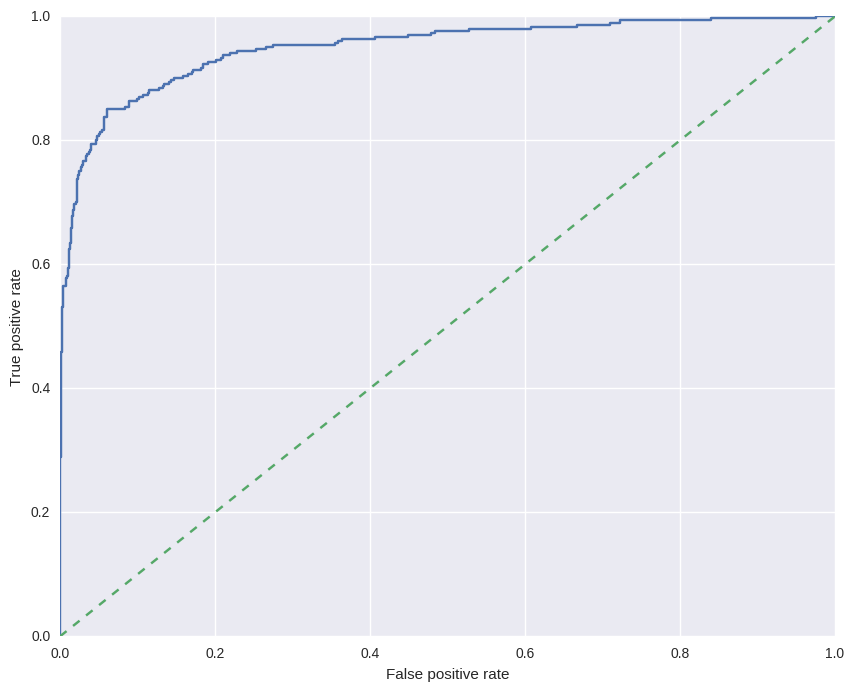

In [26]:
model = LogisticRegression()
model.fit(X, Y)
prediction = model.predict(X)
probabilities = model.predict_proba(X)

print ("The accuracy is %.3f" % accuracy_score(Y, prediction))
print ("The AUC is %.3f" % roc_auc_score(Y, probabilities[:, 1]))

fpr, tpr, thresholds = roc_curve(Y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

And don't forget to consider **lift** curves (e.g. the degree to which it “pushes up” the positive instances in a 
list above the negative instances) and **profits** too!!

</div>
<div style="width: 70%">
<img src="images/lift.png" width="100%"/>
</div>


</div>
<div style="width: 70%">
<img src="images/profits.png" width="100%"/>
</div>



### 6. Evaluation II (splitting)
Why do we never want to train and evaluate on the same data? Overfitting! Our main "tool" (technique) to evaluate and avoid overfitting is by splitting the data, and then training and evaluating on different portions.  We can do this via a single train/test split, or via cross validation. Both of these methods are, again, built into sklearn.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

Train/test splitting:

In [28]:
# Train/test splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)

model = LogisticRegression()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
probabilities = model.predict_proba(X_test)

print ("The accuracy is %.3f" % accuracy_score(Y_test, prediction))
print ("The AUC is %.3f" % roc_auc_score(Y_test, probabilities[:, 1]))

The accuracy is 0.836
The AUC is 0.900


Using the `cross_val_score()` function, we can assess models using cross validation in only one line. Check the [documentation](http://scikit-learn.org/stable/modules/model_evaluation.html) for a list of possible `scoring` values.

In [29]:
# Cross validation
model = LogisticRegression()

print ("The accuracy is %.3f" % np.mean(cross_val_score(model, X, Y, cv=5, scoring="accuracy")))
print ("The AUC is %.3f" % np.mean(cross_val_score(model, X, Y, cv=5, scoring="roc_auc")))

The accuracy is 0.834
The AUC is 0.875


### 7. Tuning and Complexity
By default, all the modeling procedures we use in sklearn have some settings that manage how complex they allow the resulting models to be. We've studies quite a few of these complexity parameters (usually called hyper-parameters). The act of finding the "best" parameter is usually done through a procedure of "hyper-parameter tuning".  

**IMPORTANTLY:** hyper-parameter tuning *should* be done on a data set separate from the final test set that will be used to report evaluation results.  Since hyper-parameter tuning is part of learning a model, if you don't separate out the final test set, you run the risk of not judging the overfitting done by the overall procedure.  *We sometimes ignore this when first learning about hyper-parameter tuning, because it is complicated.  You should not ignore it when applying these methods in practice.*

<table>
<tr><td>Model Type</td>
 <td>Parameter</td>
 <td>Explanation</td>
 <td>Good Range</td></tr>

<tr><td>Tree</td>
 <td>max_depth</td>
 <td>Maximum number of levels to build</td>
 <td>[1, log<sub>2</sub>(# records)]</td></tr>

<tr><td>Tree</td>
 <td>min_samples_split</td>
 <td>Minimum number of records that must be in a node for it to be split.</td>
 <td>[1, # records]</td></tr>
 
<tr><td>Tree</td>
 <td>min_samples_leaf</td>
 <td>Minimum number of records that must be at a node to call it a leaf.</td>
 <td>[1, # records]</td></tr>

<tr><td>LR</td>
 <td>C</td>
 <td>Regularization parameter. How heavily should the model be penalized for being complex?</td>
 <td>[10<sup>-10</sup>, 10<sup>10</sup>]</td></tr>

<tr><td>SVM</td>
 <td>C</td>
 <td>Similar to logistic regression</td>
 <td>[10<sup>-10</sup>, 10<sup>10</sup>]</td></tr>
 
<tr><td>NB</td>
 <td>alpha</td>
 <td>Smoothing constant. Essential to ensure 0 probabilities don't zero-out the product.  Used also to keep small counts from making a big difference.</td>
 <td>[0, ...]</td></tr>
 
<tr><td>k-NN</td>
 <td>k</td>
 <td>Number of neighbors, usually odd to avoid ties</td>
 <td>[1, number_records]</td></tr>
</table>

In [39]:
import numpy as np

# Train/test splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)

hyper_parameters = range(-10, 11)
accuracies = []
aucs = []
test_accs = []
test_aucs = []

for hyper_parameter in hyper_parameters:
    c = np.power(10.0, hyper_parameter)
    
    model = LogisticRegression(C=c)
    
    accuracies.append(np.mean(cross_val_score(model, X_train, Y_train, cv=5, scoring="accuracy")))
    aucs.append(np.mean(cross_val_score(model, X_train, Y_train, cv=5, scoring="roc_auc")))
    
    #Now, also get eval on test set, but only look at the one that's best from training cv
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    probabilities = model.predict_proba(X_test)
    test_accs.append(accuracy_score(Y_test, prediction))
    test_aucs.append(roc_auc_score(Y_test, probabilities[:, 1]))
    

print ("On the training cross-validation:")
print ("Maximum accuracy is %.3f and occurred with parameter setting of %.3e" % (np.max(accuracies), hyper_parameters[np.argmax(accuracies)]))
print ("Maximum AUC is %.3f and occurred with parameter setting of %.3e" % (np.max(aucs), hyper_parameters[np.argmax(aucs)]))

best_acc = np.argmax(accuracies)
best_auc = np.argmax(aucs)

print ()
print ("On the held-out test set:")
print ("Accuracy is %.3f for model learned with parameter setting of %.3e" % (test_accs[best_acc], hyper_parameters[np.argmax(accuracies)]))
print ("Maximum AUC is %.3f for model learned with parameter setting of %.3e" % (test_aucs[best_auc], hyper_parameters[np.argmax(aucs)]))


On the training cross-validation:
Maximum accuracy is 0.827 and occured with parameter setting of 0.000e+00
Maximum AUC is 0.884 and occured with parameter setting of -1.000e+00

On the held-out test set:
Accuracy is 0.880 for model learned with parameter setting of 0.000e+00
Maximum AUC is 0.886 and occurred with parameter setting of -1.000e+00
